In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
pd.set_option('display.max_columns', None)

In [13]:
#ablation_directory = f'./results/mdi_local.synthetic_data_linear/linear_one_group_test_300/varying_heritability_n_train'
ablation_directory = f'./results/mdi_local.synthetic_data_linear_concept_shift/linear_two_groups_concept_shift_test_300/varying_heritability_n_train'

folder_names = [folder for folder in os.listdir(ablation_directory) if os.path.isdir(os.path.join(ablation_directory, folder))]
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    df = pd.read_csv(os.path.join(ablation_directory, f"seed{seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

rf_plus_directory = f'/scratch/users/zhongyuan_liang/saved_models/auroc/linear_one_group_test_300/'
combined_df_rf_plus = pd.DataFrame()
for file in os.listdir(rf_plus_directory):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(rf_plus_directory, file))
        combined_df_rf_plus = pd.concat([combined_df_rf_plus, df], ignore_index=True)

##### Report RF Plus Performance

In [14]:
result = combined_df_rf_plus.groupby(['n_train', 'heritability', 'Model']).mean()

In [15]:
result.loc[500]

MSE        R2       Time
heritability Model                                        
0.1          RF             46.850082  0.049233   0.163476
             RF_plus        46.050486  0.065411  35.389432
             RF_plus_inbag  46.850082  0.049233   1.452363
             RF_plus_oob    45.914192  0.067970  33.803092
0.2          RF             21.407252  0.132028   0.176342
             RF_plus        20.559142  0.166067  36.942826
             RF_plus_inbag  21.407252  0.132028   1.533135
             RF_plus_oob    20.533100  0.167084  35.003354
0.4          RF              8.699625  0.295481   0.168371
             RF_plus         7.718267  0.374487  38.440253
             RF_plus_inbag   8.699625  0.295481   1.519738
             RF_plus_oob     7.707101  0.375518  35.459684
0.8          RF              2.448223  0.605366   0.159268
             RF_plus         1.285071  0.792578  38.629034
             RF_plus_inbag   2.448223  0.605366   1.489642
             RF_plus_oob     1.284484  0.792756  35.385633

In [16]:
result2 = combined_df_rf_plus.groupby(['heritability', 'n_train', 'Model']).mean()

In [17]:
result2.loc[0.8]

MSE        R2       Time
n_train Model                                       
100     RF             3.082543  0.498751   0.096515
        RF_plus        1.630231  0.734986  26.969064
        RF_plus_inbag  3.082543  0.498751   0.772101
        RF_plus_oob    1.723821  0.719696  24.873771
250     RF             2.663502  0.571322   0.120377
        RF_plus        1.310557  0.788967  26.280798
        RF_plus_inbag  2.663503  0.571322   1.019638
        RF_plus_oob    1.323038  0.787048  27.357531
500     RF             2.448223  0.605366   0.159268
        RF_plus        1.285071  0.792578  38.629034
        RF_plus_inbag  2.448223  0.605366   1.489642
        RF_plus_oob    1.284484  0.792756  35.385633
750     RF             2.407770  0.645031   0.211485
        RF_plus        1.231644  0.818008  51.150532
        RF_plus_inbag  2.407770  0.645031   2.227511
        RF_plus_oob    1.236995  0.817215  48.579276
1000    RF             1.959911  0.652620   0.265080
        RF_plus        1.165753  0.793195  75.959731
        RF_plus_inbag  1.959911  0.652620   3.114277
        RF_plus_oob    1.166498  0.793077  72.274123

##### Plot AUROC/RBO Performance

In [18]:
combined_df.head()

,rep,n_train,n_train_name,heritability,heritability_name,n_estimators,min_samples_leaf,max_features,random_state,model,fi,train_size,train_subset_size,test_size,test_subset_size,num_features,data_split_seed,sample_train_0,sample_train_1,sample_train_2,sample_train_3,sample_train_4,sample_train_5,sample_train_6,sample_train_7,sample_train_8,sample_train_9,sample_train_10,sample_train_11,sample_train_12,sample_train_13,sample_train_14,sample_train_15,sample_train_16,sample_train_17,sample_train_18,sample_train_19,sample_train_20,sample_train_21,sample_train_22,sample_train_23,sample_train_24,sample_train_25,sample_train_26,sample_train_27,sample_train_28,sample_train_29,sample_train_30,sample_train_31,sample_train_32,sample_train_33,sample_train_34,sample_train_35,sample_train_36,sample_train_37,sample_train_38,sample_train_39,sample_train_40,sample_train_41,sample_train_42,sample_train_43,sample_train_44,sample_train_45,sample_train_46,sample_train_47,sample_train_48,sample_train_49,sample_train_50,sample_train_51,sample_train_52,sample_train_53,sample_train_54,sample_train_55,sample_train_56,sample_train_57,sample_train_58,sample_train_59,sample_train_60,sample_train_61,sample_train_62,sample_train_63,sample_train_64,sample_train_65,sample_train_66,sample_train_67,sample_train_68,sample_train_69,sample_train_70,sample_train_71,sample_train_72,sample_train_73,sample_train_74,sample_train_75,sample_train_76,sample_train_77,sample_train_78,sample_train_79,sample_train_80,sample_train_81,sample_train_82,sample_train_83,sample_train_84,sample_train_85,sample_train_86,sample_train_87,sample_train_88,sample_train_89,sample_train_90,sample_train_91,sample_train_92,sample_train_93,sample_train_94,sample_train_95,sample_train_96,sample_train_97,sample_train_98,sample_train_99,sample_test_0,sample_test_1,sample_test_2,sample_test_3,sample_test_4,sample_test_5,sample_test_6,sample_test_7,sample_test_8,sample_test_9,sample_test_10,sample_test_11,sample_test_12,sample_test_13,sample_test_14,sample_test_15,sample_test_16,sample_test_17,sample_test_18,sample_test_19,sample_test_20,sample_test_21,sample_test_22,sample_test_23,sample_test_24,sample_test_25,sample_test_26,sample_test_27,sample_test_28,sample_test_29,sample_test_30,sample_test_31,sample_test_32,sample_test_33,sample_test_34,sample_test_35,sample_test_36,sample_test_37,sample_test_38,sample_test_39,sample_test_40,sample_test_41,sample_test_42,sample_test_43,sample_test_44,sample_test_45,sample_test_46,sample_test_47,sample_test_48,sample_test_49,sample_test_50,sample_test_51,sample_test_52,sample_test_53,sample_test_54,sample_test_55,sample_test_56,sample_test_57,sample_test_58,sample_test_59,sample_test_60,sample_test_61,sample_test_62,sample_test_63,sample_test_64,sample_test_65,sample_test_66,sample_test_67,sample_test_68,sample_test_69,sample_test_70,sample_test_71,sample_test_72,sample_test_73,sample_test_74,sample_test_75,sample_test_76,sample_test_77,sample_test_78,sample_test_79,sample_test_80,sample_test_81,sample_test_82,sample_test_83,sample_test_84,sample_test_85,sample_test_86,sample_test_87,sample_test_88,sample_test_89,sample_test_90,sample_test_91,sample_test_92,sample_test_93,sample_test_94,sample_test_95,sample_test_96,sample_test_97,sample_test_98,sample_test_99,load_model_time,auroc_train_subset,auprc_train_subset,rbo_09_train_subset,rbo_06_train_subset,rbo_095_train_subset,num_captured_train_subset,auroc_test_subset,auprc_test_subset,rbo_09_test_subset,rbo_06_test_subset,rbo_095_test_subset,num_captured_test_subset,auroc_test,auprc_test,rbo_09_test,rbo_06_test,rbo_095_test,num_captured_test,split_seed
0,0,100,100,0.1,0.1,100,5,0.33,42,RF,Kernel_SHAP_RF_plus,100,100,300,100,11,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,

In [19]:
combined_df["train_size"].unique()

array([ 100,  250,  500,  750, 1000])

In [20]:
combined_df["test_size"].unique()

array([300])

In [21]:
columns = ['train_size', 'rbo_06_train_subset', 'rbo_06_test_subset', 'rbo_09_train_subset', 'rbo_09_test_subset', 'rbo_095_train_subset', 'rbo_095_test_subset','rbo_06_test', 'rbo_09_test', 'rbo_095_test', 'auroc_train_subset', 'auprc_train_subset', 'auroc_test_subset', 'auprc_test_subset', 'auroc_test', 'auprc_test']
# for k in range(int(combined_df['num_features'].unique())):
#     columns.append(f'num_captured_train_subset_{k}')
#     columns.append(f'num_captured_test_subset_{k}')
#     columns.append(f'num_captured_test_{k}')

In [22]:
result_df = combined_df.groupby(['n_train', 'heritability', 'fi'])[columns].mean().reset_index()


In [23]:
heritability_01_df = result_df[result_df['heritability'] == 0.1]
heritability_02_df = result_df[result_df['heritability'] == 0.2]
heritability_04_df = result_df[result_df['heritability'] == 0.4]
heritability_08_df = result_df[result_df['heritability'] == 0.8]
n_train_100_df = result_df[result_df['n_train'] == 100]
n_train_250_df = result_df[result_df['n_train'] == 250]
n_train_500_df = result_df[result_df['n_train'] == 500]
n_train_750_df = result_df[result_df['n_train'] == 750]
n_train_1000_df = result_df[result_df['n_train'] == 1000]

In [24]:
methods = ['Kernel_SHAP_RF_plus', 
           'LIME_RF_plus',
       #'Local_MDI+_fit_on_OOB_RFPlus',
       'Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept',
      #  'Local_MDI+_fit_on_OOB_RFPlus_subtract_train_mean',
      #  'Local_MDI+_fit_on_OOB_RFPlus_subtract_pred_mean',
       #'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',
      #'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_intercept',
      #  'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_train_mean',
      #  'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_pred_mean',
       'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus',
      #  'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_intercept',
      #  'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_train_mean',
      #  'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_pred_mean',
       #'Local_MDI+_fit_on_inbag_RFPlus',
         'Random',
           'TreeSHAP_RF']
# methods_baseline = ['Kernel_SHAP_RF_plus', 'LIME_RF_plus', 'Random', 'TreeSHAP_RF']
# methods_1 = ['Local_MDI+_fit_on_OOB_RFPlus', 'Local_MDI+_fit_on_inbag_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus']
# methods_2 = ['Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_intercept', 'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_intercept']
# methods_4 = ['Local_MDI+_fit_on_OOB_RFPlus_subtract_train_mean', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_train_mean', 'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_train_mean']
# methods_5 = ['Local_MDI+_fit_on_OOB_RFPlus_subtract_pred_mean', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_pred_mean', 'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_pred_mean']
# methods_new = methods_2.copy()
# methods_new.extend(methods_4)
# methods_new.extend(methods_5)
# methods_new.extend(methods_baseline)
# methods_1.extend(methods_baseline)
# methods_2.extend(methods_baseline)
# methods_3.extend(methods_baseline)
# methods_4.extend(methods_baseline)
# methods_5.extend(methods_baseline)

In [25]:
method_colors = {
    'Kernel_SHAP_RF_plus': '#1f77b4',  # blue
    'LIME_RF_plus': '#ff7f0e',        # orange
    # 'Local_MDI+_fit_on_OOB_2': '#ffeb3b',  # green
    # 'Local_MDI+_fit_on_OOB_RFPlus': '#d62728',  # red
    'Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept': '#9467bd',  # purple
    'Local_MDI+_fit_on_OOB_RFPlus_subtract_train_mean': '#8c564b',  # brown
    'Local_MDI+_fit_on_OOB_RFPlus_subtract_pred_mean': '#e377c2',  # pink
    'Local_MDI+_fit_on_all_evaluate_on_all_2': '#7f7f7f',  # gray
    'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus': '#17becf',  # cyan
    'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_intercept': '#2ca02c',  # yellow
    'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_train_mean': '#d62728',  # red
    'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_pred_mean': '#9467bd',  # purple
    'Local_MDI+_fit_on_all_evaluate_on_oob_2': '#8c564b',  # brown
    'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus': '#f7b6d2',  # magenta
    'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_intercept': '#7f7f7f',  # gray
    'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_train_mean': '#ffeb3b',  # yellow
    'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_pred_mean': '#e377c2',  # pink
    'Local_MDI+_fit_on_inbag_RFPlus': '#00ff00',  # lime
    'Random': '#000000',  # black
    'TreeSHAP_RF': '#d62728'  # teal
}

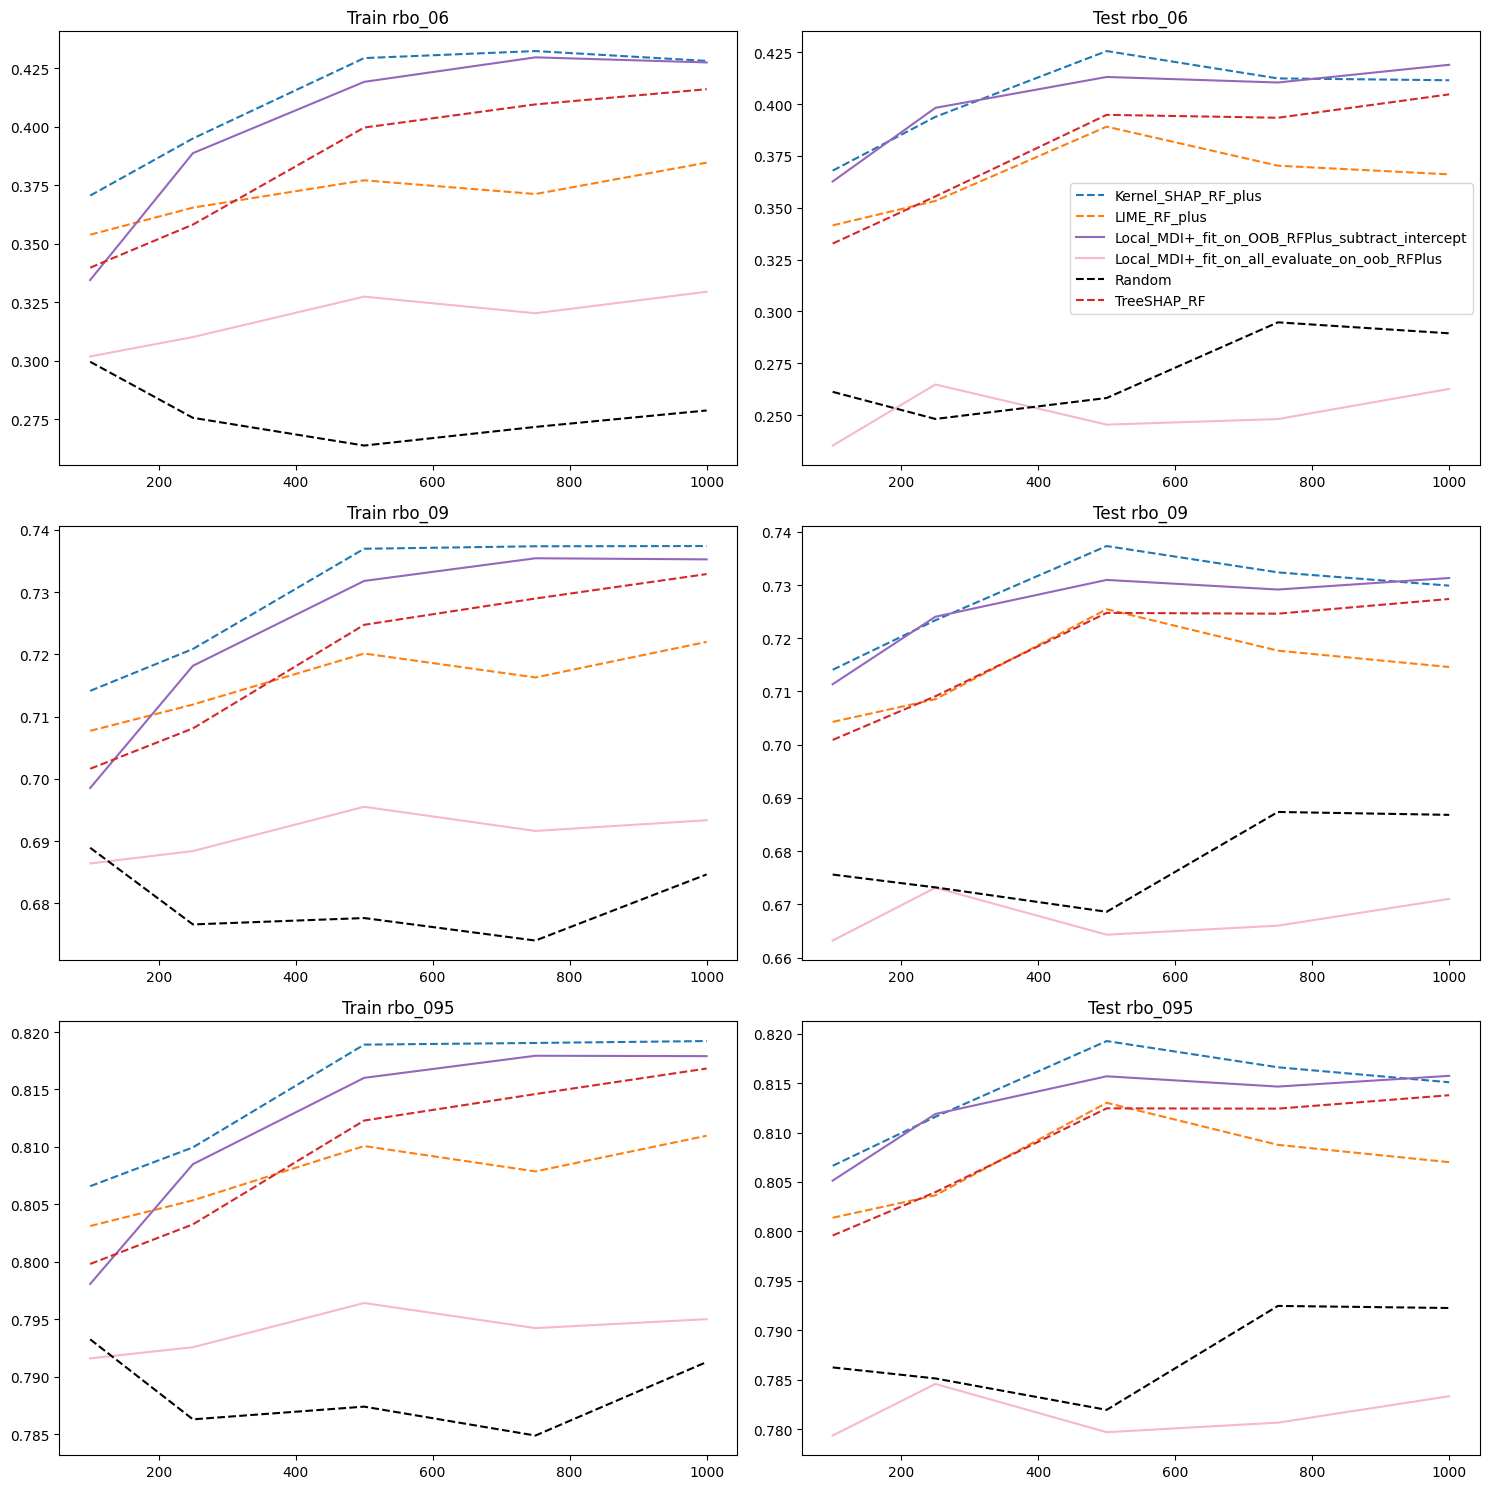

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Define the DataFrame
df = heritability_01_df

dotted_methods = ['Random', 'Kernel_SHAP_RF_plus', 'LIME_RF_plus', 'TreeSHAP_RF']

# Iterate over the methods and plot each subplot
for method in methods:
    subset = df[df['fi'] == method]
    
    # Set line style based on method
    linestyle = '--' if method in dotted_methods else '-'
    
    axes[0, 0].plot(subset['train_size'], subset['rbo_06_train_subset'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[0, 1].plot(subset['train_size'], subset['rbo_06_test_subset'], label=method, linestyle=linestyle, color=method_colors[method])

    axes[1, 0].plot(subset['train_size'], subset['rbo_09_train_subset'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[1, 1].plot(subset['train_size'], subset['rbo_09_test_subset'], label=method, linestyle=linestyle, color=method_colors[method])

    axes[2, 0].plot(subset['train_size'], subset['rbo_095_train_subset'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[2, 1].plot(subset['train_size'], subset['rbo_095_test_subset'], label=method, linestyle=linestyle, color=method_colors[method])

# Add the legend and titles
axes[0, 1].legend(loc='best')
axes[0, 0].set_title('Train rbo_06')
axes[0, 1].set_title('Test rbo_06')
axes[1, 0].set_title('Train rbo_09')
axes[1, 1].set_title('Test rbo_09')
axes[2, 0].set_title('Train rbo_095')
axes[2, 1].set_title('Test rbo_095')

plt.tight_layout()
plt.show()

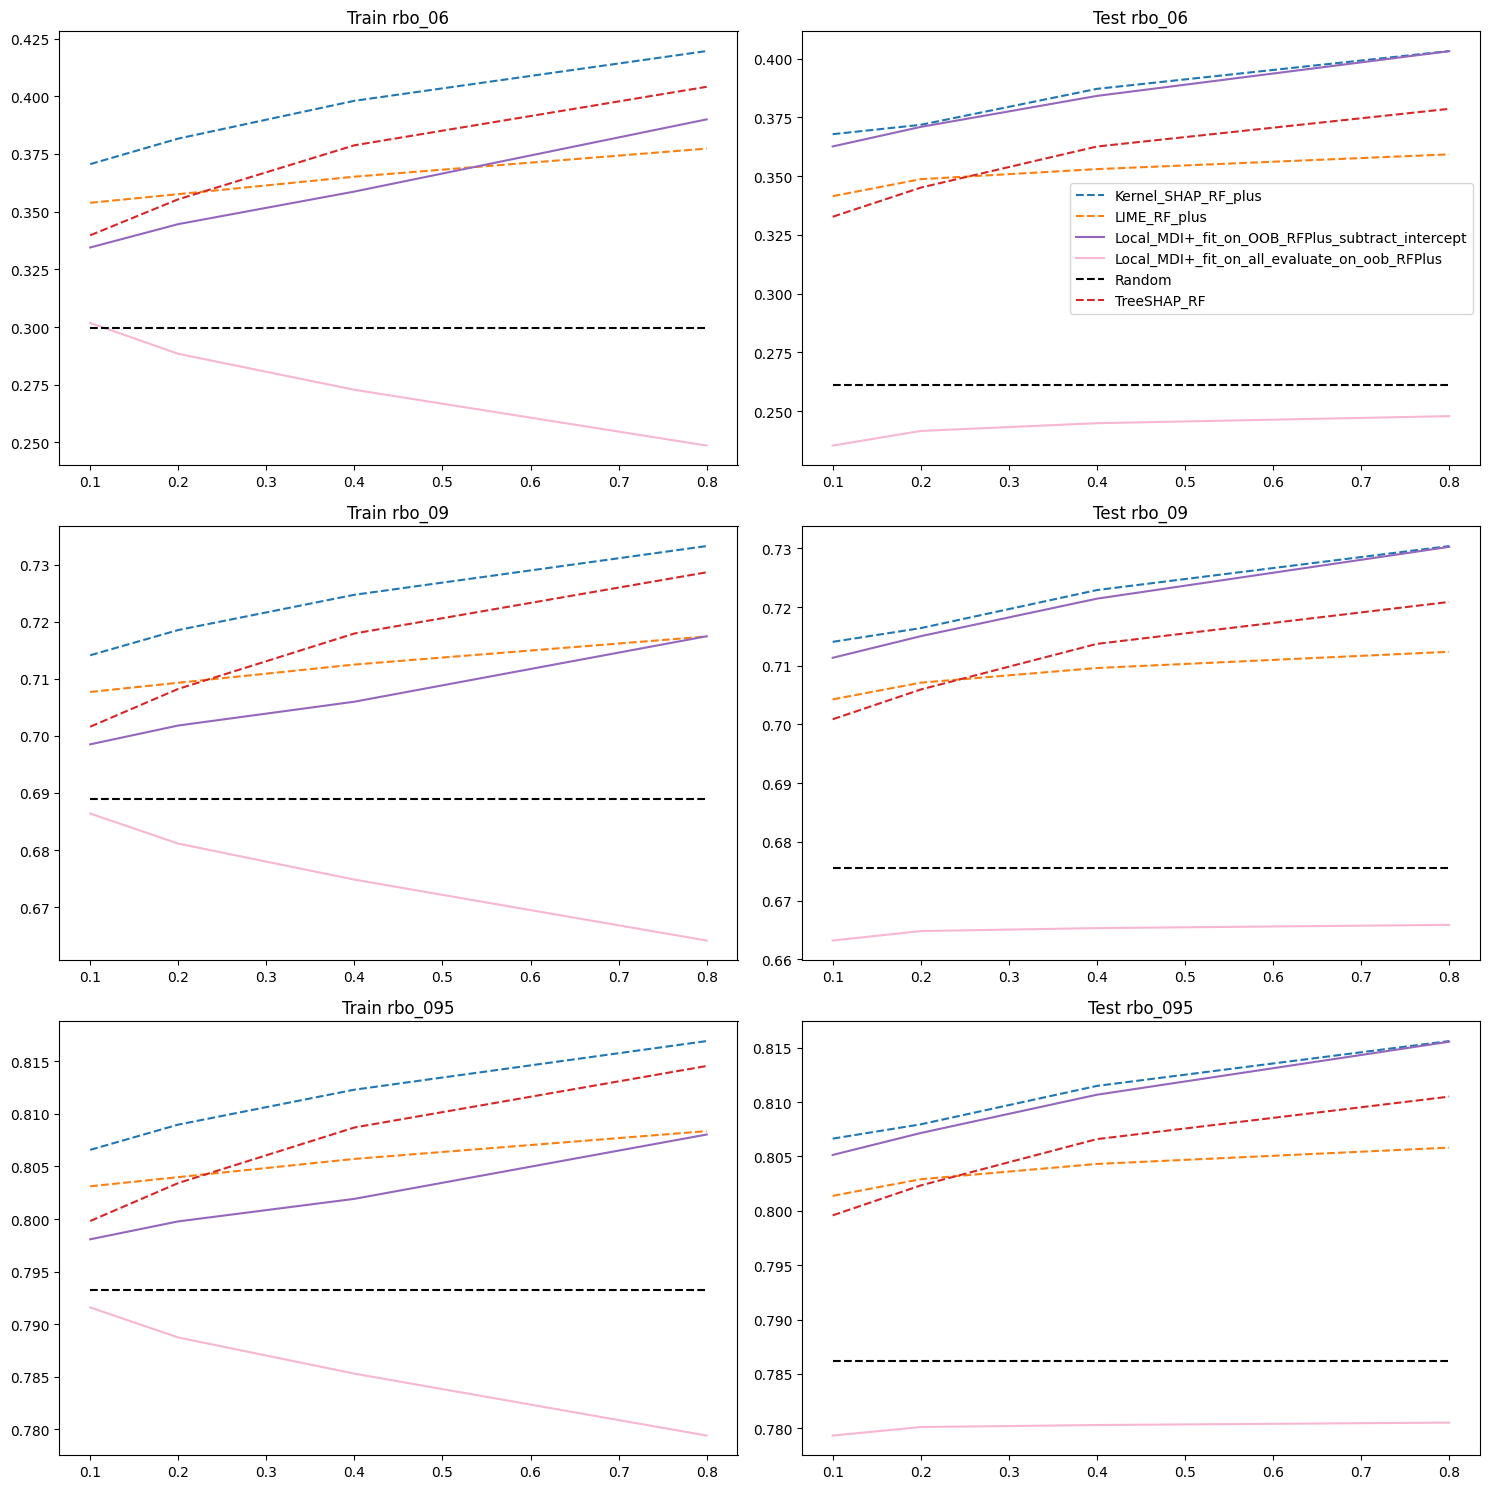

In [34]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Define the DataFrame
df = n_train_100_df

dotted_methods = ['Random', 'Kernel_SHAP_RF_plus', 'LIME_RF_plus', 'TreeSHAP_RF']

# Iterate over the methods and plot each subplot
for method in methods:
    subset = df[df['fi'] == method]
    
    # Set line style based on method
    linestyle = '--' if method in dotted_methods else '-'
    
    axes[0, 0].plot(subset['heritability'], subset['rbo_06_train_subset'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[0, 1].plot(subset['heritability'], subset['rbo_06_test_subset'], label=method, linestyle=linestyle, color=method_colors[method])

    axes[1, 0].plot(subset['heritability'], subset['rbo_09_train_subset'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[1, 1].plot(subset['heritability'], subset['rbo_09_test_subset'], label=method, linestyle=linestyle, color=method_colors[method])

    axes[2, 0].plot(subset['heritability'], subset['rbo_095_train_subset'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[2, 1].plot(subset['heritability'], subset['rbo_095_test_subset'], label=method, linestyle=linestyle, color=method_colors[method])

# Add the legend and titles
axes[0, 1].legend(loc='best')
axes[0, 0].set_title('Train rbo_06')
axes[0, 1].set_title('Test rbo_06')
axes[1, 0].set_title('Train rbo_09')
axes[1, 1].set_title('Test rbo_09')
axes[2, 0].set_title('Train rbo_095')
axes[2, 1].set_title('Test rbo_095')

plt.tight_layout()
plt.show()

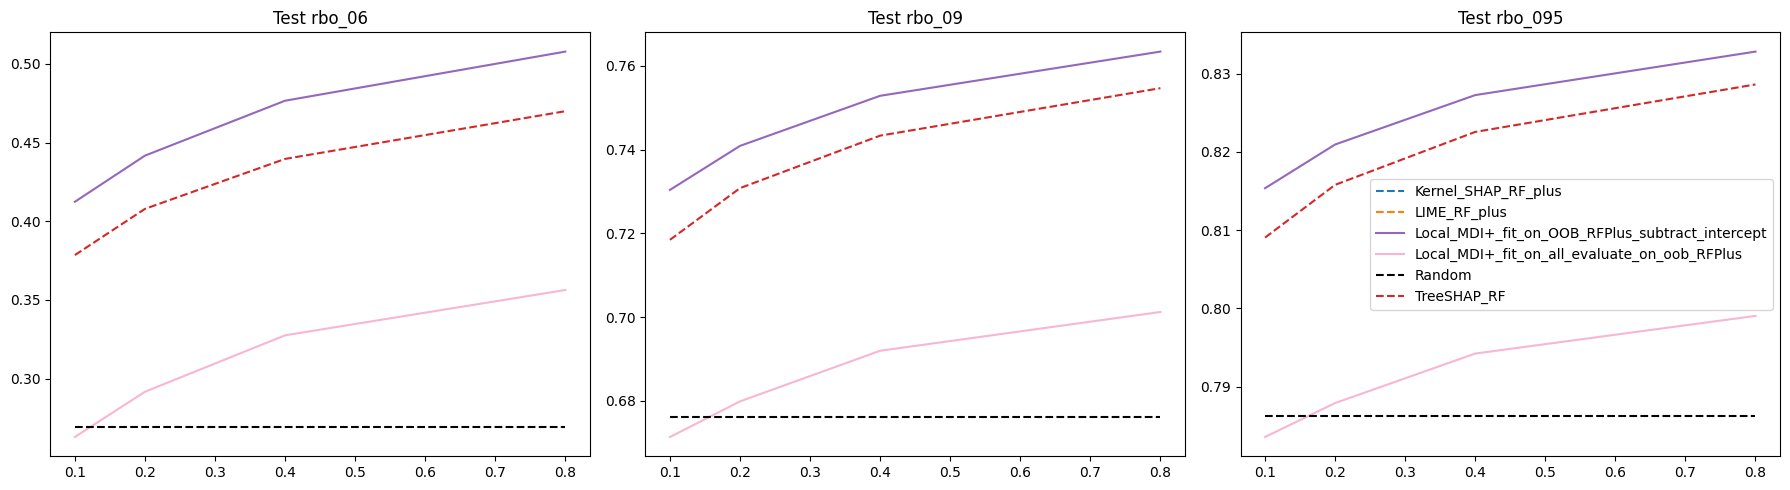

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define the DataFrame
df = n_train_500_df

dotted_methods = ['Random', 'Kernel_SHAP_RF_plus', 'LIME_RF_plus', 'TreeSHAP_RF']

# Iterate over the methods and plot each subplot
for method in methods:
    subset = df[df['fi'] == method]
    
    # Set line style based on method
    linestyle = '--' if method in dotted_methods else '-'
    
    # Plot the data for rbo_06_test_subset
    axes[0].plot(subset['heritability'], subset['rbo_06_test'], label=method, linestyle=linestyle, color=method_colors[method])
    
    # Plot the data for rbo_09_test_subset
    axes[1].plot(subset['heritability'], subset['rbo_09_test'], label=method, linestyle=linestyle, color=method_colors[method])
    
    # Plot the data for rbo_095_test_subset
    axes[2].plot(subset['heritability'], subset['rbo_095_test'], label=method, linestyle=linestyle, color=method_colors[method])

# Add the legend and titles
axes[2].legend(loc='best')
axes[0].set_title('Test rbo_06')
axes[1].set_title('Test rbo_09')
axes[2].set_title('Test rbo_095')

plt.tight_layout()
plt.show()

In [29]:
n_train_500_df[["heritability", "fi", "rbo_06_test", "rbo_06_test_subset"]]

,heritability,fi,rbo_06_test,rbo_06_test_subset
136,0.1,Kernel_SHAP_RF_plus,NaN,0.425541
137,0.1,LIME_RF_plus,NaN,0.389090
138,0.1,Local_MDI+_fit_on_OOB_RFPlus,0.251514,0.238782
139,0.1,Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept,0.412337,0.413048
140,0.1,Local_MDI+_fit_on_OOB_RFPlus_subtract_pred_mean,0.413610,0.414041
...,...,...,...,...
199,0.8,Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_s...,0.524392,0.492545
200,0.8,Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_s...,0.524237,0.491924
201,0.8,Local_MDI+_fit_on_inbag_RFPlus,0.240563,0.237535
202,0.8,Random,0.269186,0.258257


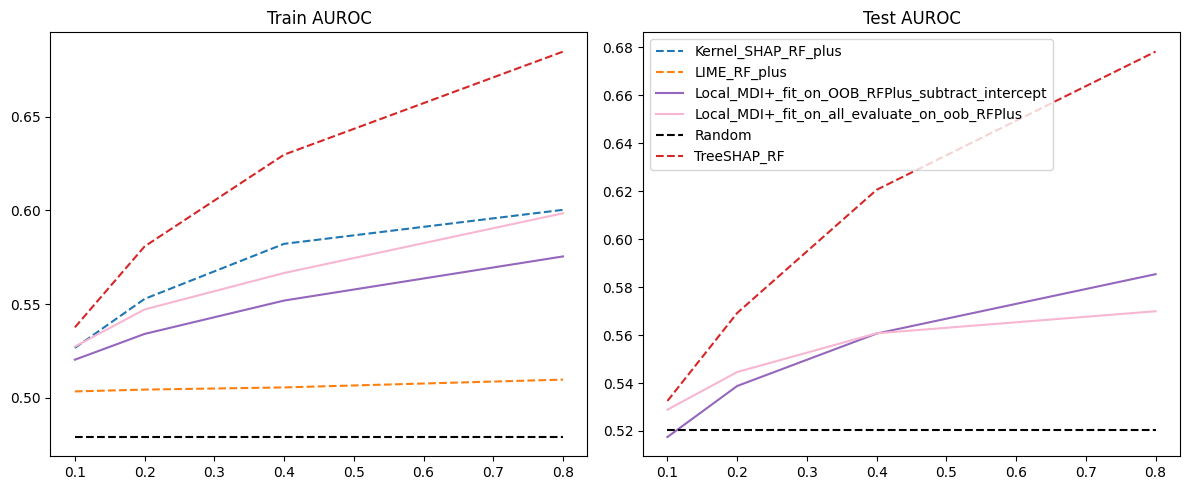

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define the DataFrame
df = n_train_750_df

dotted_methods = ['Random', 'Kernel_SHAP_RF_plus', 'LIME_RF_plus', 'TreeSHAP_RF']

# Iterate over the methods and plot each subplot
for method in methods:
    subset = df[df['fi'] == method]
    
    # Set line style based on method
    linestyle = '--' if method in dotted_methods else '-'
    
    # Plot the data for rbo_06_test_subset
    axes[0].plot(subset['heritability'], subset['auroc_train_subset'], label=method, linestyle=linestyle, color=method_colors[method])
    
    # Plot the data for rbo_09_test_subset
    axes[1].plot(subset['heritability'], subset['auroc_test'], label=method, linestyle=linestyle, color=method_colors[method])

# Add the legend and titles
axes[1].legend(loc='best')
axes[0].set_title('Train AUROC')
axes[1].set_title('Test AUROC')

plt.tight_layout()
plt.show()

KeyError: 'num_captured_train_subset_0'

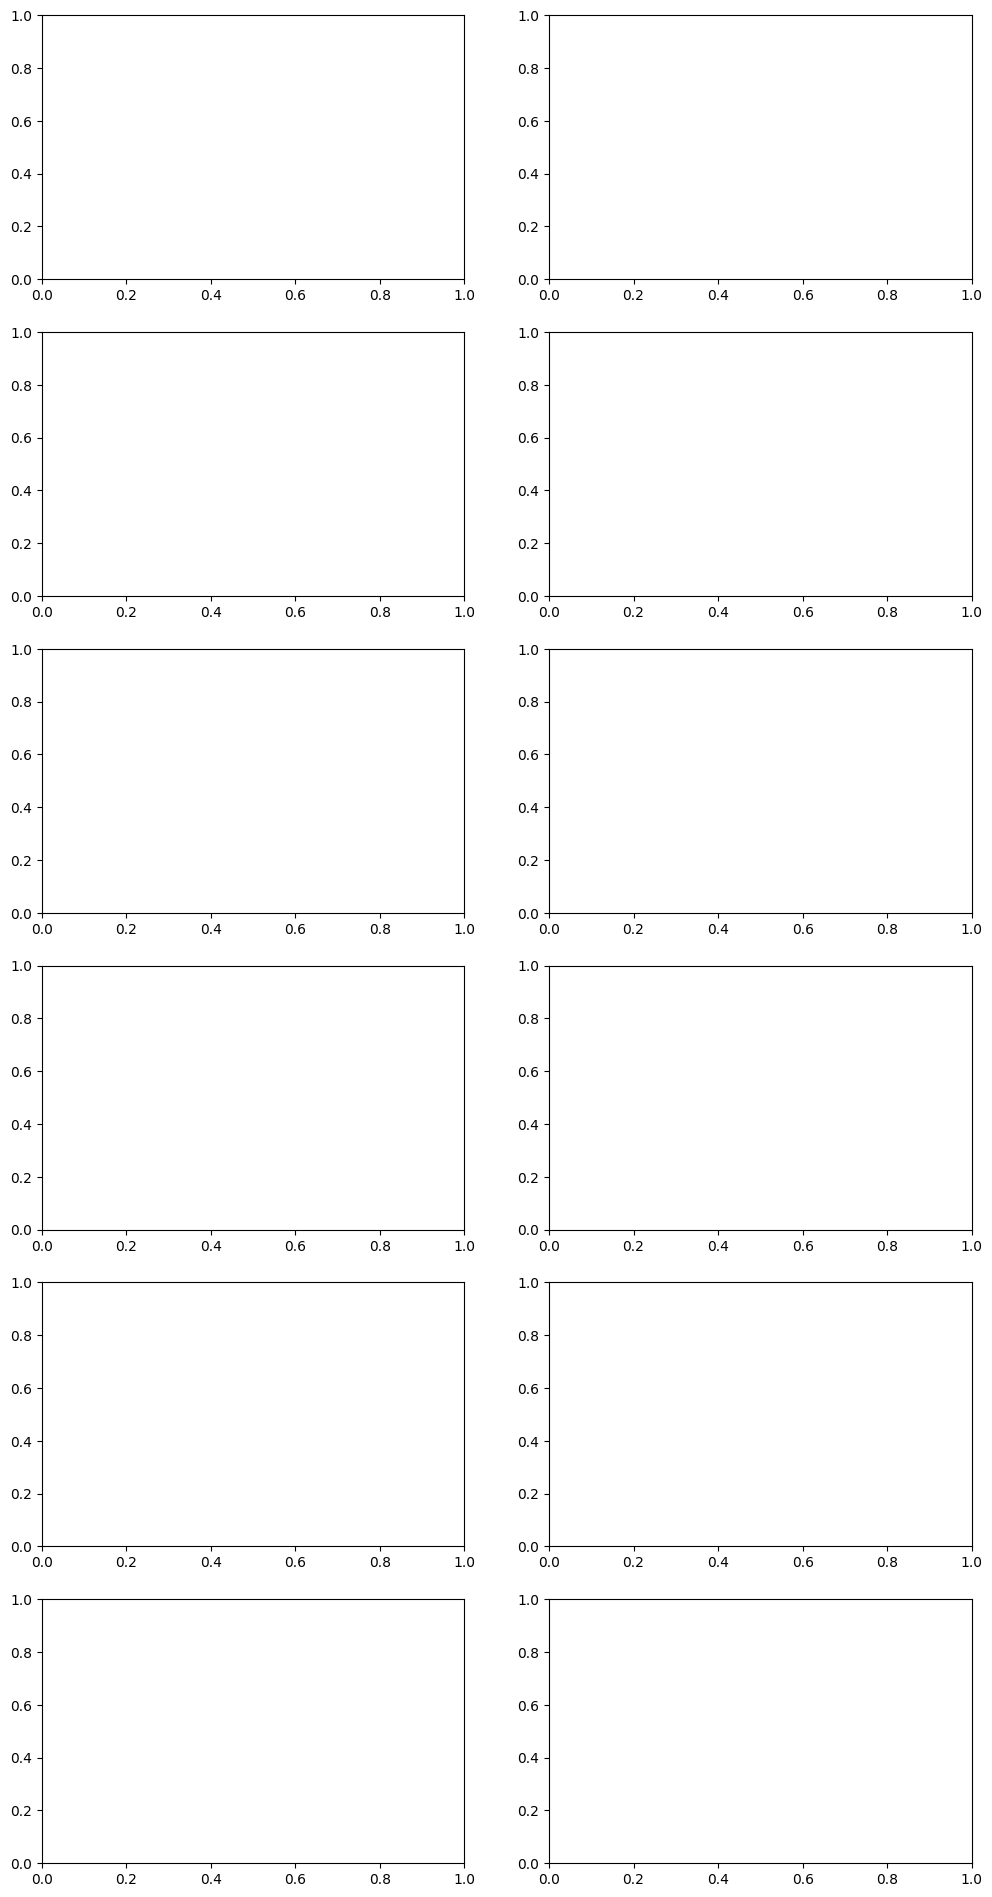

In [31]:
fig, axes = plt.subplots(6, 2, figsize=(12, 24))

# Define the DataFrame
df = heritability_04_df

dotted_methods = ['Random', 'Kernel_SHAP_RF_plus', 'LIME_RF_plus', 'TreeSHAP_RF']

# Iterate over the methods and plot each subplot
for method in methods:
    subset = df[df['fi'] == method]
    
    # Set line style based on method
    linestyle = '--' if method in dotted_methods else '-'
    
    axes[0,0].plot(subset['train_size'], subset['num_captured_train_subset_0'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[0,1].plot(subset['train_size'], subset['num_captured_test_subset_0'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[1,0].plot(subset['train_size'], subset['num_captured_train_subset_1'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[1,1].plot(subset['train_size'], subset['num_captured_test_subset_1'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[2,0].plot(subset['train_size'], subset['num_captured_train_subset_2'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[2,1].plot(subset['train_size'], subset['num_captured_test_subset_2'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[3,0].plot(subset['train_size'], subset['num_captured_train_subset_3'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[3,1].plot(subset['train_size'], subset['num_captured_test_subset_3'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[4,0].plot(subset['train_size'], subset['num_captured_train_subset_4'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[4,1].plot(subset['train_size'], subset['num_captured_test_subset_4'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[5,0].plot(subset['train_size'], subset['num_captured_train_subset_5'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[5,1].plot(subset['train_size'], subset['num_captured_test_subset_5'], label=method, linestyle=linestyle, color=method_colors[method])

axes[0,1].legend(loc='best')
axes[0,0].set_title('Train num_captured_0')
axes[0,1].set_title('Test num_captured_0')
axes[1,0].set_title('Train num_captured_1')
axes[1,1].set_title('Test num_captured_1')
axes[2,0].set_title('Train num_captured_2')
axes[2,1].set_title('Test num_captured_2')
axes[3,0].set_title('Train num_captured_3')
axes[3,1].set_title('Test num_captured_3')
axes[4,0].set_title('Train num_captured_4')
axes[4,1].set_title('Test num_captured_4')
axes[5,0].set_title('Train num_captured_5')
axes[5,1].set_title('Test num_captured_5')

plt.tight_layout()
plt.show()